<a href="https://colab.research.google.com/github/Roshan-Velpula/Machine-Learning-models-from-scratch/blob/main/LogisticRegression_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LogisticRegression

Logistic regression is a popular supervised machine learning algorithm used for classification tasks. Unlike linear regression, which is used for predicting continuous numerical values, logistic regression is used for predicting discrete categorical values. It is a binary classification algorithm that predicts the probability of an input belonging to one of two classes.

The logistic regression algorithm works by fitting a logistic function to a set of training data. The logistic function, also known as the sigmoid function, is a mathematical function that maps any input value to a value between 0 and 1. 


The logistic function is defined as follows:

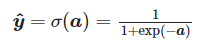


Unline in Linear Regression, Here we use a binary cross entropy cost function instead of a least squares cost function. The main idea behind this since our dependent variable is binary (1,0) using statistical modeling we can model this data as induvidual bernoulli trails and use Maximum Likelihood estimaton to get this cost function. 

Also, why binary cross entropy is better that least squares for classification problems? **This is because our binary cross entropy cost function penalizes a wrong classification more than a least squares function does**, this resulting in gradient to shift more. *(Also, this can not be used for regression problems because in regression we are dealing with continous values, even if the model makes a slight mistake we shouldn't penalize it more as the gradient will just oscilate more and never converge)* 

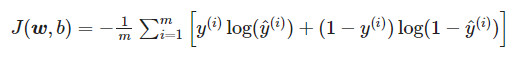

Iterations with Gradient: 

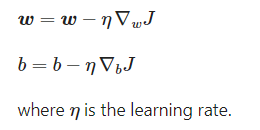

In [63]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=5, random_state=11)
m = 1000

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


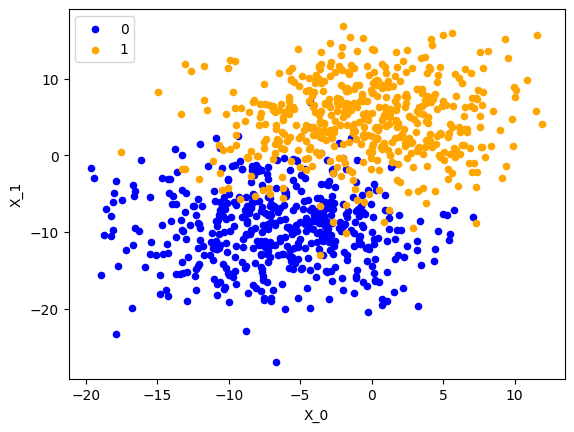

In [64]:
from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

In [65]:
import numpy as np
from sklearn.model_selection import train_test_split

In [66]:
# Reshape targets to get column vector with shape (n_samples, 1)
#y_true = Y[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750,)
Shape X_test: (250, 2)
Shape y_test: (250,)


In [67]:
from posixpath import join
class LogisticRegression:
  def __init__(self):
    pass
  
  def train(self, X, y, lr = 0.001 , n_iter = 500):
    
    n_samples , n_features = X.shape
    self.w = np.zeros(shape = n_features)
    self.b = 0
    costs = []
    j = 0
    while True:

      temp_w = self.w
      temp_b = self.b
      a = np.dot(X,self.w) + self.b
      y_hat = 1 / (1 + np.exp(-a))
      cost = -(1/n_samples) * np.sum(y*np.log(y_hat) + (1-y) * np.log(1 - y_hat))
      costs.append(cost)

      if j % 100 == 0:
                print(f"Cost after iteration {j}: {cost}")

      dw = (1/n_samples) * np.sum(np.dot(X.T,(y_hat - y)))
      db = (1 / n_samples) * np.sum(y_hat - y)

      self.w = self.w - lr* dw
      self.b = self.b - lr*db

      if np.linalg.norm(self.w - temp_w) < pow(10, -6) and np.abs(self.b - temp_b) < pow(10, -6): #Stopping condition - if 2nd norm between previous and current values don't change significantly

        return self.w, self.b, costs
      
      if j > n_iter:

        return self.w, self.b, costs

      
      j+=1
  
  def predict(self, X):
    y_predict = (np.dot(X, self.w) + self.b)
    y_predict = 1 / (1 + np.exp(-y_predict))
    y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]
    return np.array(y_predict_labels)#[:, np.newaxis]
      




In [68]:
logreg = LogisticRegression()

In [69]:
w, b , costs = logreg.train(X_train, y_train, lr = 0.001, n_iter = 1000)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.3346883085500646
Cost after iteration 200: 0.3188662781929763
Cost after iteration 300: 0.31403646770634586
Cost after iteration 400: 0.3113123639358907
Cost after iteration 500: 0.30917991720425164
Cost after iteration 600: 0.3072561069783533
Cost after iteration 700: 0.3054254560265389
Cost after iteration 800: 0.30364961355072434
Cost after iteration 900: 0.30191491815222044
Cost after iteration 1000: 0.3002160882719677


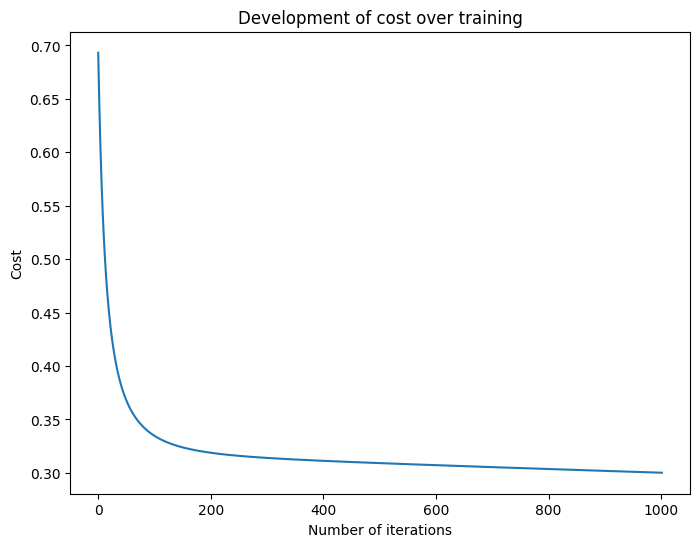

In [70]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(costs)), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [71]:
logreg.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0])

In [72]:
y_p_train = logreg.predict(X_train)
y_p_test = logreg.predict(X_test)

print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test))}%")

train accuracy: 87.73333333333333%
test accuracy: 99.844%


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


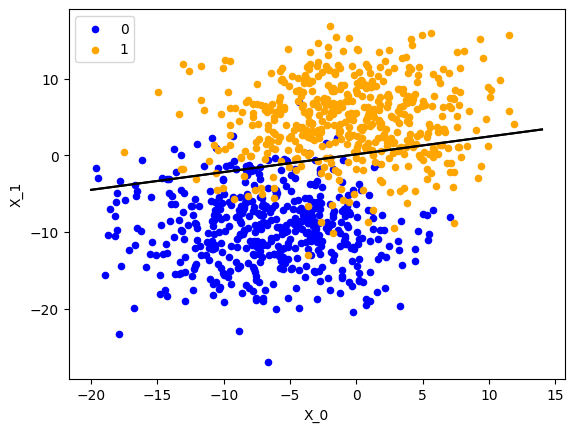

In [77]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = np.array([formula(i) for i in x]) # create array for y values
    plt.plot(x, y, color = 'black')  
    
def my_formula(x):
    return (b + w*x).ravel()

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()